# Exam

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#os.chdir("C:/Users/adamw/Desktop/Development/EXAM")

# Question 1. Correlation is 0

In [66]:
gamma = 0.5
# mean of ln s and ln k cannot be 0! if mean of s and k is 1, then mean of ln(s) and ln(k) is 0. Therefore, I must find it numerically

# if correlation between ln(s) and ln(k) is 0 then covariance is 0
cov = [[1.416,0],[0,0.749]]

# SOLUTION: find mean of s and k numerically
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    # Draw random samples from a multivariate normal distribution.
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001 #precision
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001       
        
               
print("mean of ln(s): ", round(mean_ln_s,3))
print("mean of ln(k): ", round(mean_ln_k,3))

mean of ln(s):  -0.709
mean of ln(k):  -0.374


In [67]:
s = np.e**ln_s
k = np.e**ln_k

print("mean of s: ", round(np.mean(s),3))
print("mean of k: ", round(np.mean(k),3))  

mean of s:  1.009
mean of k:  1.004


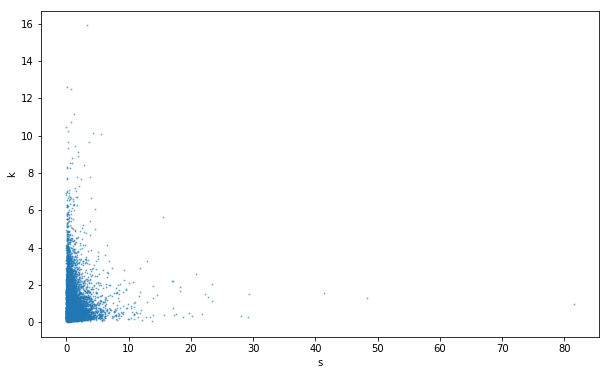

In [68]:
plt.scatter(s,k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("k")
plt.rcParams["figure.figsize"] = (10,6)

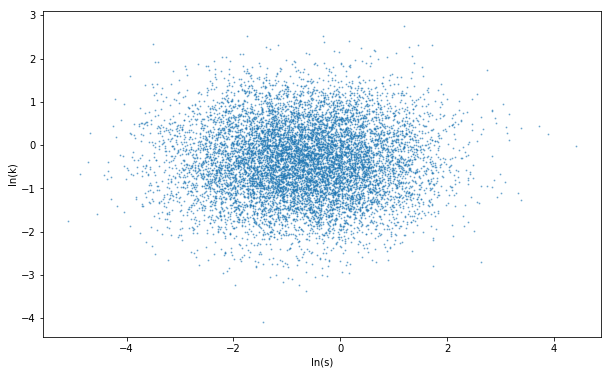

In [69]:
plt.scatter(ln_s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("ln(k)")
plt.rcParams["figure.figsize"] = (10,6)

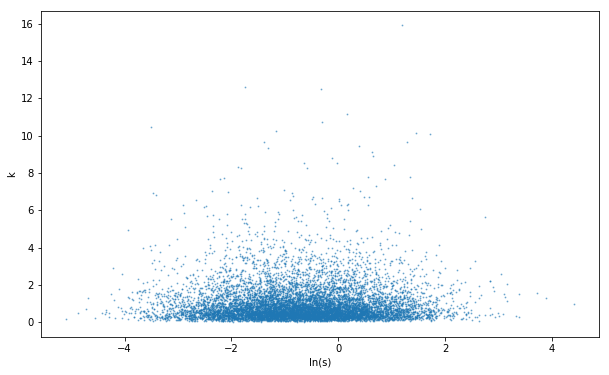

In [70]:
plt.scatter(ln_s,k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("k")
plt.rcParams["figure.figsize"] = (10,6)

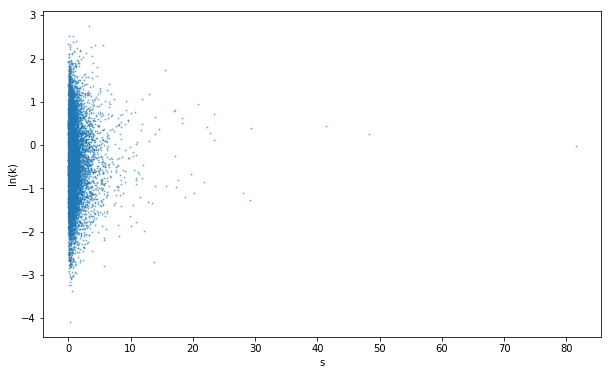

In [71]:
plt.scatter(s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("ln(k)")
plt.rcParams["figure.figsize"] = (10,6) 

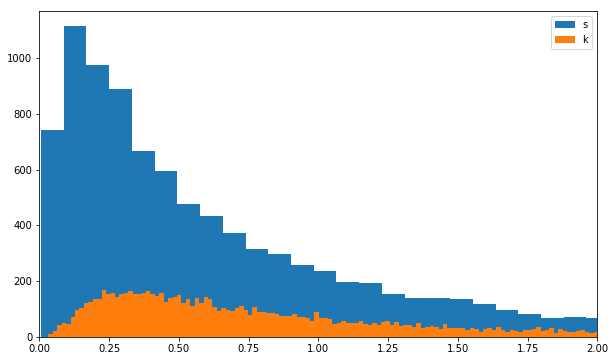

In [72]:
plt.hist(s, bins=1000, label="s")
plt.hist(k, bins=1000, label="k")
plt.xlim([0,2])
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

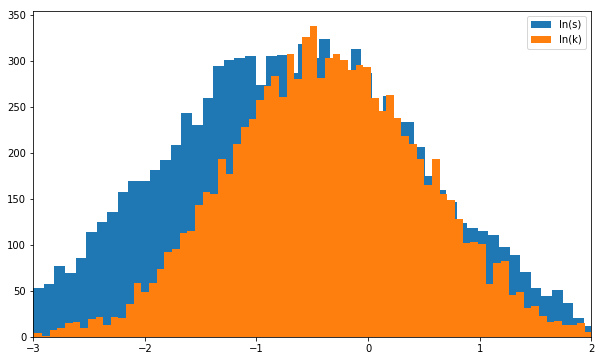

In [73]:
plt.hist(ln_s, bins=100, label="ln(s)")
plt.hist(ln_k, bins=100, label="ln(k)")
plt.xlim([-3,2])
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

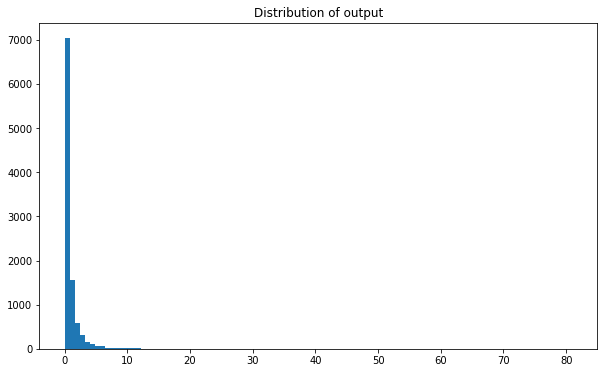

In [74]:
# Question 1.2
y = s*k**gamma
Y = sum(y)

plt.hist(y, bins=100)
plt.title("Distribution of output")
plt.rcParams["figure.figsize"] = (10,6)

In [75]:
# Question 1.3
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    Denominator = sum( (s[i]/s)**(1/(gamma-1)) )
    k_opt[i]= K/Denominator

print("Variance of optimal capital distribution: ", round(np.var(k_opt), 3))
print("Variance of true capital distribution: ", round(np.var(k), 3))

Variance of optimal capital distribution:  267.668
Variance of true capital distribution:  1.07


Problem: 
$$ max_{k_i} \sum_i s_i k_i^\gamma $$
st. 
$$ K = \sum_i k_i $$

$$ L = \sum_i s_i k_i^\gamma + \lambda(K - \sum_i k_i) $$

FOC:
$$ [k_i]: s_i \gamma k_i^{\gamma - 1} = \lambda $$
$$ [k_j]: s_j \gamma k_j^{\gamma - 1} = \lambda $$

which implies: $$ \frac{s_i}{s_j} (\frac{k_i}{k_j})^{\gamma-1} = 1 $$
so $$ k_j = (\frac{s_i}{s_j})^\frac{1}{(\gamma - 1)} k_i $$

Therefore,
$$ k_i = K - \sum_{j \neg i} k_j $$
$$ k_i ( (1 + \frac{s_i}{s_j})^\frac{1}{(\gamma - 1)} + (\frac{s_z}{s_z})^\frac{1}{(\gamma - 1)} + ...) = K $$
$$ k_i = \frac{K}{( (1 + \frac{s_i}{s_j})^\frac{1}{(\gamma - 1)} + (\frac{s_z}{s_z})^\frac{1}{(\gamma - 1)} + ...)} $$

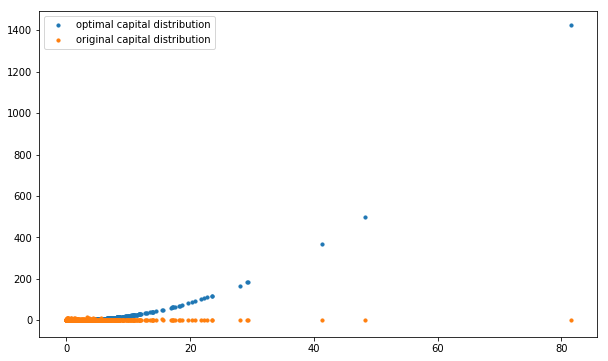

In [76]:
# Question 1.4 
plt.scatter(s, k_opt,s=10, label="optimal capital distribution")
plt.scatter(s, k,s=10, label="original capital distribution")
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

In [77]:
# Question 1.5
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
Gain = Y_opt/Y
print("Gain in output: ", round(Gain,3))

Gain in output:  2.327


In [78]:
y_opt ==y

array([False, False, False, ..., False, False, False])

In [79]:
np.var(y)

4.196534483528527

In [81]:
np.var(y_opt)

1248.7573891867198

In [ ]:
# Question 1.2
plt.hist(y_opt, label = "y optimal", bins=100)
plt.hist(y, label="y original", bins=60)
plt.xlim([0,50])
plt.legend()

plt.title("Distribution of output")
plt.rcParams["figure.figsize"] = (10,6)

# Question 1. Correlation is 0.25

In [62]:
gamma = 0.5
# mean of ln s and ln k cannot be 0! if mean of s and k is 1, then mean of ln(s) and ln(k) is 0. Therefore, I must find it numerically

# if correlation between ln(s) and ln(k) is 0.25 then covariance is 0.25^2
cov = [[1.416,0.95**2],[0.95**2,0.749]]

# SOLUTION: find mean of s and k numerically
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    # Draw random samples from a multivariate normal distribution.
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001 #precision
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001       
        
               
print("mean of ln(s): ", round(mean_ln_s,3))
print("mean of ln(k): ", round(mean_ln_k,3))

mean of ln(s):  -0.708
mean of ln(k):  -0.374


In [63]:
s = np.e**ln_s
k = np.e**ln_k

print("mean of s: ", round(np.mean(s),3))
print("mean of k: ", round(np.mean(k),3))  

mean of s:  0.999
mean of k:  1.0


So I got mean of s and k which is almost exactly 1.

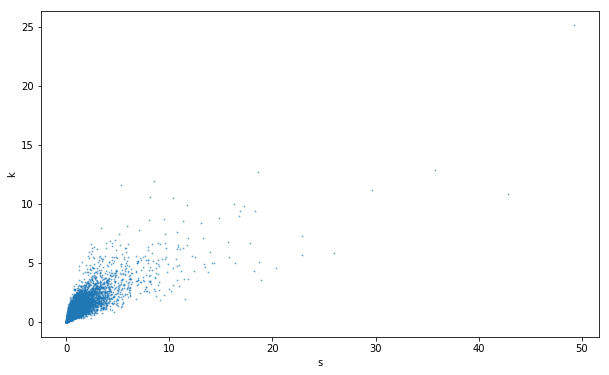

In [64]:
plt.scatter(s,k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("k")
plt.rcParams["figure.figsize"] = (10,6)

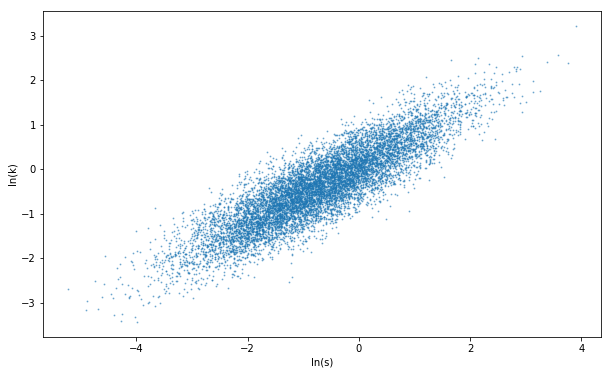

In [65]:
plt.scatter(ln_s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("ln(k)")
plt.rcParams["figure.figsize"] = (10,6)

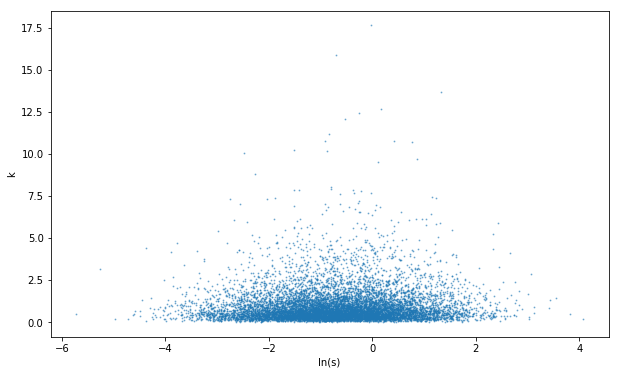

In [21]:
plt.scatter(ln_s,k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("k")
plt.rcParams["figure.figsize"] = (10,6)

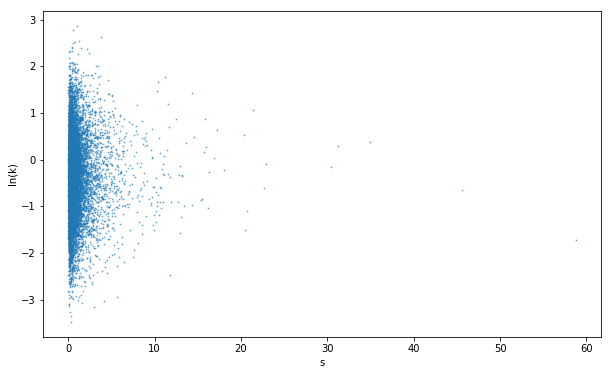

In [22]:
plt.scatter(s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("ln(k)")
plt.rcParams["figure.figsize"] = (10,6) 

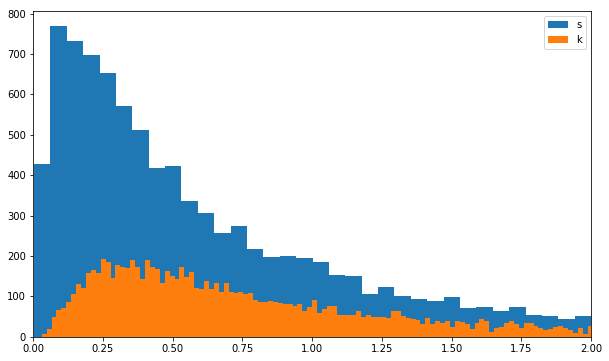

In [23]:
plt.hist(s, bins=1000, label="s")
plt.hist(k, bins=1000, label="k")
plt.xlim([0,2])
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

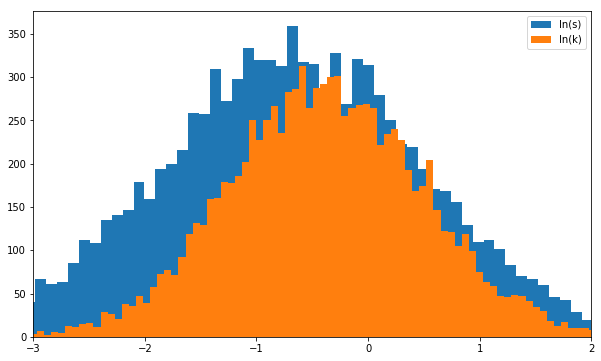

In [24]:
plt.hist(ln_s, bins=100, label="ln(s)")
plt.hist(ln_k, bins=100, label="ln(k)")
plt.xlim([-3,2])
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

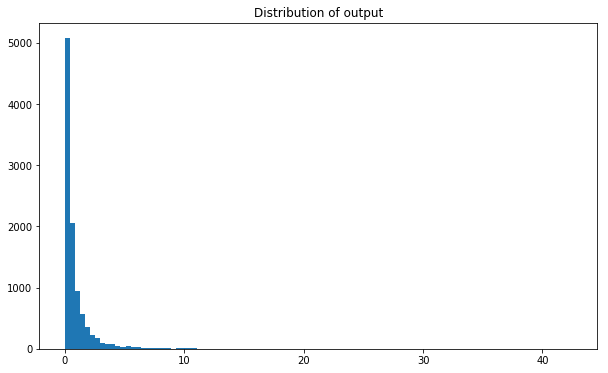

In [25]:
# Question 1.2
y = s*k**gamma
Y = sum(y)

plt.hist(y, bins=100)
plt.title("Distribution of output")
plt.rcParams["figure.figsize"] = (10,6)

In [26]:
# Question 1.3
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    Denominator = sum( (s[i]/s)**(1/(gamma-1)) )
    k_opt[i]= K/Denominator

print("Variance of optimal capital distribution: ", round(np.var(k_opt), 3))
print("Variance of true capital distribution: ", round(np.var(k), 3))

Variance of optimal capital distribution:  122.782
Variance of true capital distribution:  1.112


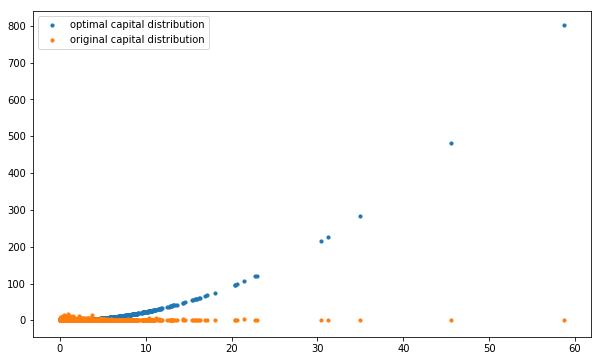

In [27]:
# Question 1.4 
plt.scatter(s, k_opt,s=10, label="optimal capital distribution")
plt.scatter(s, k,s=10, label="original capital distribution")
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

In [28]:
# Question 1.5
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
Gain = Y_opt/Y
print("Gain in output: ", round(Gain,3))

Gain in output:  2.204


# Question 2

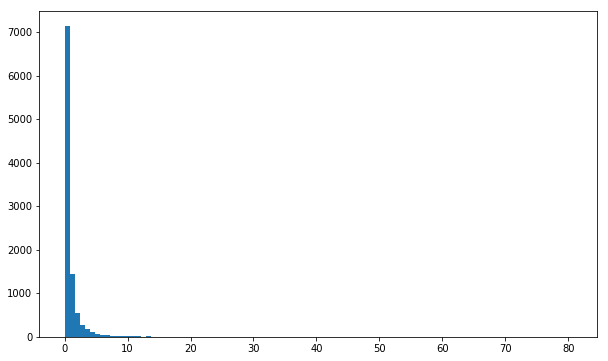

In [83]:
# Question 2.1
gamma = 0.8
# Question 2.2
y = s*k**gamma
Y = sum(y)
plt.hist(y, bins=100)
plt.rcParams["figure.figsize"] = (10,6)

In [84]:
# Question 2.3
i=0
K = sum(k)
k_opt_6 = [0]*10000
for i in range(10000):
    Denominator = sum( (s[i]/s)**(1/(gamma-1)) )
    k_opt_6[i]= K/Denominator

In [85]:
print("variance of optimal capital in all villages: ", round(np.var(k_opt_6),3))
print("varianve of true capital in all villages: ", round(np.var(k),3))

variance of optimal capital in all villages:  7767.796
varianve of true capital in all villages:  1.07


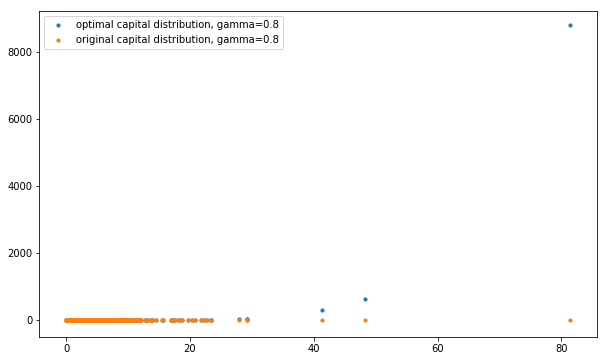

In [86]:
#Question 2.4
plt.scatter(s, k_opt_6,s=10, label="optimal capital distribution, gamma=0.8")
plt.scatter(s, k,s=10, label="original capital distribution, gamma=0.8")
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

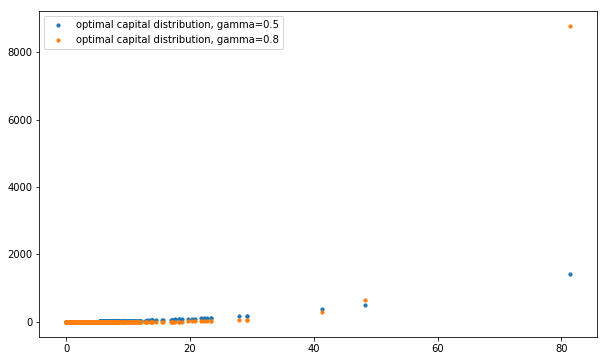

In [87]:
plt.scatter(s, k_opt,s=10, label="optimal capital distribution, gamma=0.5")
plt.scatter(s, k_opt_6,s=10, label="optimal capital distribution, gamma=0.8")
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

In [88]:
# Question 2.5 
k_opt_6 = np.array(k_opt_6)
y_opt_6 = s*k_opt_6**gamma
Y_opt_6 = sum(y_opt_6)

Gain_6 = Y_opt_6/Y

#data = pd.DataFrame(np.column_stack((s, k, y, k_opt, y_opt, k_opt_6, y_opt_6)), columns=["s", "k", "y", "k_opt", "y_opt", "k_opt_6", "y_opt_6"])
#data.to_csv("data.csv")

print("Average gain of optizing the capital distribution in villages: ", round(Gain, 3))

Average gain of optizing the capital distribution in villages:  2.327


Although gamma has been changed, the gain in output is the same.

# Question 3

In [35]:
gamma = 0.5 # reset gamma
data = pd.read_csv("data.csv") #read data from question 1 and 2

In [36]:
Y_village = [0]*100
Y_opt_village = [0]*100

i=0
k_opt_village = [[0]*10]*100
k_village = [[0]*10]*100
y_opt_village = [[0]*10]*100
for village in range(100):
    sample = data.sample(10)
    sample = sample.reset_index()
    k_village[village] = sample.k
    K = sum(sample.k)
    for i in range(10):
        Denominator = sum( (sample.s[i]/sample.s)**(1/(gamma-1)) )
        k_opt_village[village][i]= K/Denominator       
    
    k_opt_village = np.array(k_opt_village)
    k_village = np.array(k_village)
    y_opt_village[village] = sample.s*k_opt_village[village]**gamma
    Y_opt_village[village] = sum(y_opt_village[village])
    Y_village[village] = sum(sample.y)
        
Gain_3 = np.array(Y_opt_village)/np.array(Y_village)

print("Gain in output: ", round(np.mean(Gain_3),3))

Gain in output:  1.609


Gain is smaller if we optimize at the level of village than at the aggregate level.

# Question 4

In [40]:
gamma = 0.8
# mean of ln s and ln k cannot be 0! if mean of s and k is 1, then mean of ln(s) and ln(k) is 0. Therefore, I must find it numerically

# if correlation between ln(s) and ln(k) is 0.25 then covariance is 0.25^2
cov = [[1.416,0.25**2],[0.25**2,0.749]]

# SOLUTION: find mean of s and k numerically
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    # Draw random samples from a multivariate normal distribution.
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001 #precision
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001

s = np.e**ln_s
k = np.e**ln_k

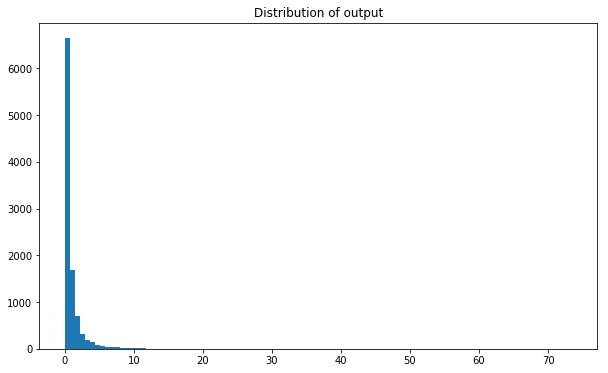

In [41]:
## Question 4.1
# CES is the Cobb-Douglas function for sigma = 1, so we have that s_new = np.power(a, alpha)*np.power(k, 1-alpha)
alpha = 0.5

a = s
s_new = np.power(a, alpha)*np.power(k, 1-alpha)
y = s_new*k**gamma
    
plt.hist(y, bins=100)
plt.title("Distribution of output")
plt.rcParams["figure.figsize"] = (10,6)

In [42]:
## Question 4.2. Solve the maximization problem

i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    Denominator = sum( (s_new[i]/s_new)**(-alpha/(gamma-alpha)) )
    k_opt[i]= K/Denominator

print("Variance of optimal capital distribution: ", round(np.var(k_opt), 3))
print("Variance of true capital distribution: ", round(np.var(k), 3))

Variance of optimal capital distribution:  3.157
Variance of true capital distribution:  1.09


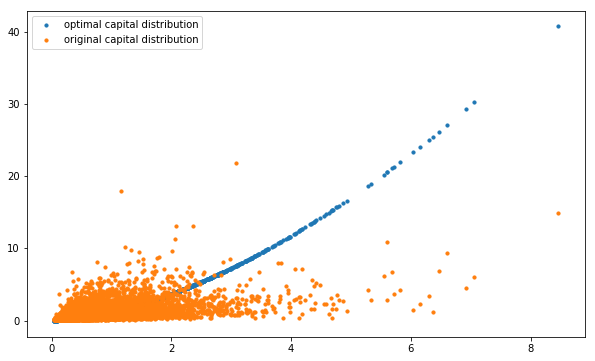

In [43]:
# Question 4.3. Compare your the optimal allocations kie against the data

plt.scatter(s_new, k_opt,s=10, label="optimal capital distribution")
plt.scatter(s_new, k,s=10, label="original capital distribution")
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

In [44]:
## Question 4.4. Compute the ouptut gains from reallocation, i.e., Y e where Y = sum yi 
Y = sum(y)
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
Gain = Y_opt/Y
print("Gain in output: ", round(Gain,3))

Gain in output:  1.542


Problem: 
$$ max_{k_i} \sum_i s_i (a_i, k_i) k_i^\gamma $$
st. 
$$ K = \sum_i k_i $$

if $ \sigma = 1 $ then CES becomes Cobb-Douglas, so problem can be reformulated as:

$$ max_{k_i} \sum_i a_i^\alpha k_i^{1-\alpha+\gamma} $$


FOC:
$$ [k_i]: (1-\alpha+\gamma) k_i^{\gamma-\alpha} a_i^{\alpha} = \lambda $$
$$ [k_j]: (1-\alpha+\gamma) k_j^{\gamma-\alpha} a_j^{\alpha} = \lambda $$

which implies: $$ (\frac{a_i}{a_j})^{-\alpha} (\frac{k_i}{k_j})^{\gamma-\alpha} = 1 $$
so $$ k_j = (\frac{a_j}{a_i})^\frac{-\alpha}{(\gamma -\alpha)} k_j $$

Therefore,
$$ k_i = K - \sum_{j \neg i} k_j $$
$$ k_i ( (1 + \frac{a_i}{a_j})^\frac{-\alpha}{(\gamma -\alpha)} + (\frac{a_z}{a_z})^\frac{-\alpha}{(\gamma -\alpha)} + ...) = K $$
$$ k_i = \frac{K}{( 1 + (\frac{a_i}{a_j})^\frac{-\alpha}{(\gamma -\alpha)} + (\frac{a_z}{a_z})^\frac{-\alpha}{(\gamma -\alpha)} + ...)} $$